In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string


In [ ]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.drop(df.columns[[0,3]],axis = 1,inplace=True)

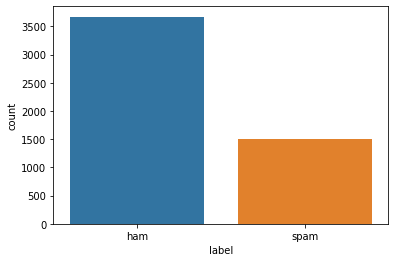

In [ ]:
import seaborn as sns
sns.countplot(data=df,x='label')

In [ ]:
df.shape

(5171, 2)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(4993, 2)

In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_word_nltk=nltk.corpus.stopwords.words('english')
print(len(stop_word_list))
print(len(stopwords))

179
1158


In [ ]:
def preprocess_email(email):

  x = [i for i in email if i not in string.punctuation]
  x = ''.join(x)
  
  words_only = [word for word in x.split() if word.lower() not in stopwords]

  return words_only


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
messages_BoW = CountVectorizer(analyzer=preprocess_email).fit_transform(df['text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_BoW, df['label'], test_size = 0.20, stratify=df['label'])

In [ ]:
messages_BoW.shape

(4993, 49549)

SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()
clf.fit(X_train,y_train)

              precision    recall  f1-score   support

         ham       0.99      0.96      0.98       706
        spam       0.92      0.98      0.95       293

    accuracy                           0.97       999
   macro avg       0.96      0.97      0.96       999
weighted avg       0.97      0.97      0.97       999

Accuracy of SVM:  0.96996996996997


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix: 


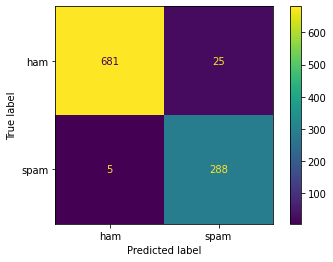

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix, accuracy_score
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))
acc_svm = accuracy_score(y_test, prediction)
print('Accuracy of SVM: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', plot_confusion_matrix(clf,X_test,y_test))

LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       706
        spam       0.96      0.99      0.97       293

    accuracy                           0.98       999
   macro avg       0.98      0.99      0.98       999
weighted avg       0.99      0.98      0.99       999

Accuracy of LR:  0.984984984984985
Confusion Matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


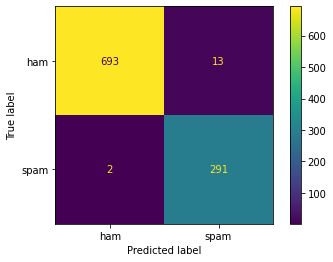

In [ ]:
prediction = lr_model.predict(X_test)
print(classification_report(y_test, prediction))
acc_lr = accuracy_score(y_test, prediction)
print('Accuracy of LR: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', plot_confusion_matrix(lr_model,X_test,y_test))

K-EN YAKIN KOMŞU (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

              precision    recall  f1-score   support

         ham       0.96      0.88      0.92       706
        spam       0.76      0.92      0.83       293

    accuracy                           0.89       999
   macro avg       0.86      0.90      0.88       999
weighted avg       0.90      0.89      0.90       999

Accuracy of KNN:  0.8928928928928929


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix: 


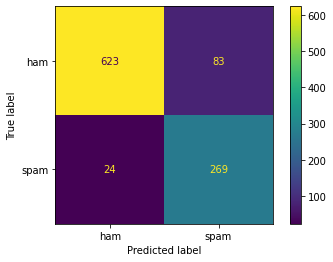

In [ ]:
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
acc_knn = accuracy_score(y_test, prediction)
print('Accuracy of KNN: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', plot_confusion_matrix(knn,X_test,y_test))

NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naivebayes_ = MultinomialNB().fit(X_train,y_train)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       706
        spam       0.97      0.98      0.97       293

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999

Accuracy of NB:  0.983983983983984
Confusion Matrix: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


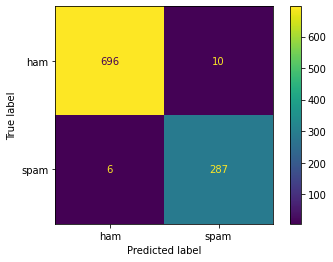

In [ ]:
prediction = naivebayes_.predict(X_test)
print(classification_report(y_test, prediction))
acc_nb = accuracy_score(y_test, prediction)
print('Accuracy of NB: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', plot_confusion_matrix(naivebayes_,X_test,y_test))